### Логистическая регрессия

1. Загрузите данные `load_wine` из `sklearn.datasets`. Из данных исключите объекты класса 2.
 Отмасштабируйте признаки, используя класс `StandardScaler` с гиперпараметрами по умолчанию. Обучите логистическую регрессию и оцените важность признаков. Укажите название признака, который оказался наименее значимым.

Обратите внимание, целевое значение лежит по ключу `'target'`, матрица объекты-признаки лежит по ключу `'data'`



In [ ]:
from sklearn.datasets import load_wine
data = load_wine()
print(data['feature_names'])
print(data['target'])
print(data['data'])
print(len(data['target']))
print(data['target'].tolist().count(2))
# 178 - 48 = 130 
X = data['data'][:130]
y = data['target'][:130]
print(y)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
178
48
[0 0 0 0 0 0 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = LogisticRegression(random_state=13)
clf.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[[-1.47009497 -0.44223339 -0.78215096  1.0520694  -0.28398722 -0.02265905
  -0.29966359  0.1280095   0.04997573 -0.67775832  0.07345462 -0.4907117
  -1.70749013]]


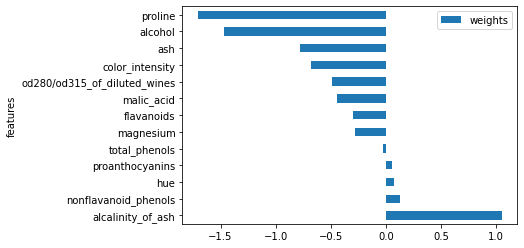

In [ ]:
import pandas as pd

print(clf.coef_)

sorted_weights = sorted(zip(clf.coef_.ravel(), data['feature_names']), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
df = pd.DataFrame({'features': features, 'weights':weights})
ax = df.plot.barh(x='features', y='weights', rot=0, )

array([[-1.24783014, -0.33320871, -0.73253281,  1.1143071 , -0.13647396,
         0.12749437, -0.55279144,  0.17204274,  0.06183145, -0.9470274 ,
         0.00637312, -0.47856264, -1.64081984]])

index 10 or more probably 5

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [ ]:
# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression()
# clf.fit(X, y)
# clf.coef_

array([[-1.54159556, -0.49400041, -0.97150156,  1.23984657, -0.23754033,
        -0.03352988, -0.33050451,  0.17508679,  0.18676656, -0.79642193,
         0.15133522, -0.62736253, -1.81341988]])

index 5: Phenols

2. Загрузите данные `load_wine` из `sklearn.datasets`. Из обучающей части исключите объекты соответствующие классу 2. Не масштабируйте признаки. Обучите логистическую регрессию с гиперпараметрами по умолчанию.
Выберите признак из предложенных, которому соответствует минимальный вес. 


In [ ]:
data2 = load_wine()
X2 = data2['data'][:130]
y2 = data2['target'][:130]
print(y)

clf2 = LogisticRegression()
clf2.fit(X2, y2)
clf2.coef_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 0.82670106, -1.00925441, -0.99533037,  0.49154037,  0.0188785 ,
         0.06936071, -0.70476256, -0.05849043,  0.48247088, -0.79418846,
         0.34335511, -0.64635388, -0.01637045]])

index 12 (from zero): Proline

3. Решается задача бинарной классификации. Дана матрица объекты признаки 𝑋 и ответы для объектов  𝑦. Обучите логистическую регрессию и предскажите класс объекта x_new

In [ ]:
import numpy as np

In [ ]:
X = np.array([[1, 1], [0.3, 0.7], [0, 4], [-2, -7], [0, -2], [-1, -1], [-2, 0]])
y = np.array([1, 1, 1, 0, 0, 0, 0])
x_new = np.array([[-5, 1]])

In [ ]:
clf3 = LogisticRegression()
clf3.fit(X, y)
clf3.predict(x_new)
# without scaler

array([0])

### Классификация текстов

4. Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer` с гиперпараметрами по умолчанию на текстах из обучающей части и получите векторное представление для объектов обучающей и тестовой части. Укажите полученное число признаков.


Чтобы загрузить данные, скачайте файл по ссылке. Если вы используете google colab, то пример загрузки данных приведен ниже.

In [ ]:
import pandas as pd
from google.colab import files
uploder = files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [ ]:
sms_data = pd.read_csv('SMSSpamCollection', delimiter='\t', header=None, names=['type', 'text'])
print(sms_data)
X_train = sms_data['text'][:4000]
X_test = sms_data['text'][4000:]
y_train = sms_data['type'][:4000]
y_test = sms_data['type'][4000:]

      type                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf_idf = TfidfVectorizer()

X_train_tfidf = vectorizer_tf_idf.fit_transform(X_train)
print(vectorizer_tf_idf.get_feature_names())

#X_train_tfidf, X_test_tfidf = bow(vectorizer_tf_idf, 
#                                  X_train, 
#                                  X_test)

X_train_tfidf.shape

['00', '000', '000pes', '008704050406', '0089', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07046744435', '07090201529', '07090298926', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '07801543489', '07808', '07815296484', '07821230901', '07880867867', '07946746291', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '08700469649', '08700621170150p', '08701237397', '08701417012', '08701417012150p', '0870141701216', '087016248', '08701752560', '087018728737', '0870241182716', '08702

(4000, 7331)

5.  Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer`, помимо слов входящих в тексты, учитывайте биграммы (используйте гиперпараметр `ngram_range`). Укажите полученное число признаков.

In [ ]:
sms_data2 = pd.read_csv('SMSSpamCollection', delimiter='\t', header=None, names=['type', 'text'])
X_train2 = sms_data2['text'][:4000]
X_test2 = sms_data2['text'][4000:]
y_train2 = sms_data2['type'][:4000]
y_test2 = sms_data2['type'][4000:]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf_idf = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vectorizer_tf_idf.fit_transform(X_train)
X_train_tfidf.shape

(4000, 39805)

6. Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer`, не учитывайте слова, которые встретились меньше 2 раз в обучающей выборке (используйте гиперпараметр `min_df`). Укажите полученное число признаков.

In [ ]:
sms_data3 = pd.read_csv('SMSSpamCollection', delimiter='\t', header=None, names=['type', 'text'])
X_train3 = sms_data3['text'][:4000]
X_test3 = sms_data3['text'][4000:]
y_train3 = sms_data3['type'][:4000]
y_test3 = sms_data3['type'][4000:]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf_idf = TfidfVectorizer(min_df=2)
X_train_tfidf = vectorizer_tf_idf.fit_transform(X_train)
X_train_tfidf.shape

(4000, 3377)

In [ ]:
vectorizer_tf_idf = TfidfVectorizer(min_df=2)
X_train_tfidf, X_test_tfidf = bow(vectorizer_tf_idf, 
                                  X_train, 
                                  X_test)

X_train_tfidf.shape

(4000, 3377)

7. Загрузите файл SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer` с гиперпараметрами по умолчанию на текстах из обучающей части и получите векторное представление для объектов обучающей и тестовой части. На полученных векторных представлениях обучите логистическую регрессию и оцените долю правильных ответов на тестовой части. Укажите полученное значение доли правильных ответов.

In [ ]:
sms_data4 = pd.read_csv('SMSSpamCollection', delimiter='\t', header=None, names=['type', 'text'])
X_train4 = sms_data4['text'][:4000]
X_test4 = sms_data4['text'][4000:]
y_train4 = sms_data4['type'][:4000]
y_test4 = sms_data4['type'][4000:]

In [ ]:
def bow(vectorizer, train, test):
  train_bow = vectorizer.fit_transform(train)
  test_bow = vectorizer.transform(test)
  return train_bow, test_bow

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

vectorizer_tf_idf = TfidfVectorizer()
#X_train_tfidf = vectorizer_tf_idf.fit_transform(X_train)
#X_train_tfidf.shape

X_train_bow, X_test_bow = bow(vectorizer_tf_idf, 
                              X_train, 
                              X_test)

clf = LogisticRegression()
clf.fit(X_train_bow, y_train)
print ('LogisticRegression: ',
       accuracy_score(clf.predict(X_test_bow), y_test))

LogisticRegression:  0.9694656488549618
